# Synthetic Particle Tracking - Test 1
-----------------
This code is obtained from DeepTrack2 library notebooks: https://github.com/softmatterlab/DeepTrack2

**Adapted by:** Eberto Benjumea and Juan C. Peña

In [ ]:
%matplotlib inline
!pip install deeptrack

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/master/examples/LodeSTAR/03.track_BF-C2DL-HSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [ ]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt
import cv2

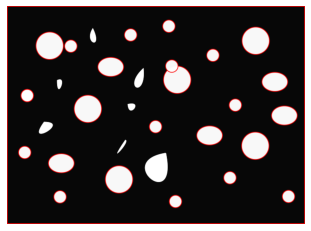

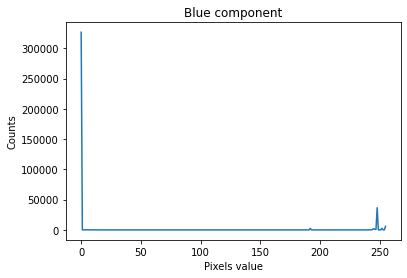

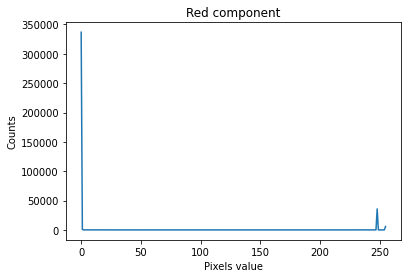

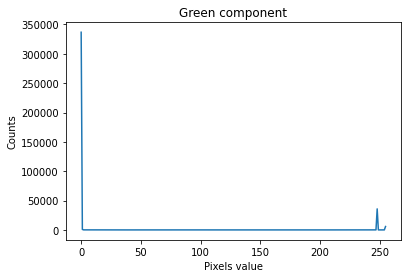

In [ ]:
# find frequency of pixels in range 0-255
training_image = dt.LoadImage(f"sintetica.png")()._value 
#training_image  = cv2.cvtColor(training_image , cv2.COLOR_BGR2RGB)
plt.imshow(training_image)
plt.axis("off")

name_comp=['Blue','Red','Green']
for i in range(0,3):
  histr = cv2.calcHist([training_image],[i],None,[256],[0,256])
  #print(i)
  # show the plotting graph of an image
  plt.figure()
  plt.plot(histr)
  plt.ylabel('Counts')
  plt.xlabel('Pixels value')
  plt.title(name_comp[i]+' component')
  plt.show()

In [ ]:
training_image

array([[[252,   0,   0, 248],
        [252,   0,   0, 248],
        [252,   0,   0, 248],
        ...,
        [252,   0,   0, 248],
        [252,   0,   0, 248],
        [252,   0,   0, 248]],

       [[252,   0,   0, 248],
        [236,   0,   0, 248],
        [192,   0,   0, 248],
        ...,
        [192,   0,   0, 248],
        [236,   0,   0, 248],
        [252,   0,   0, 248]],

       [[252,   0,   0, 248],
        [192,   0,   0, 248],
        [  0,   0,   0, 248],
        ...,
        [  0,   0,   0, 248],
        [192,   0,   0, 248],
        [252,   0,   0, 248]],

       ...,

       [[252,   0,   0, 248],
        [192,   0,   0, 248],
        [  0,   0,   0, 248],
        ...,
        [  0,   0,   0, 248],
        [192,   0,   0, 248],
        [252,   0,   0, 248]],

       [[252,   0,   0, 248],
        [236,   0,   0, 248],
        [192,   0,   0, 248],
        ...,
        [192,   0,   0, 248],
        [236,   0,   0, 248],
        [252,   0,   0, 248]],

       [[252

(-0.5, 217.5, 158.5, -0.5)

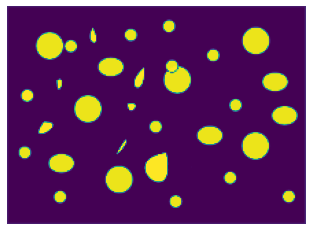

In [ ]:


training_image = dt.LoadImage(f"sintetica.png")()._value 
training_image  = cv2.cvtColor(training_image , cv2.COLOR_BGR2RGB)/ 256
#training_image = 0.21*training_image[:,:,0] + 0.72*training_image[:,:,1]+ 0.07*training_image[:,:,2]
training_image = 0.2989*training_image[:,:,0] + 0.5870*training_image[:,:,1]+ 0.1140*training_image[:,:,2]

training_image  = cv2.resize(training_image, (0, 0), fx=0.3, fy=0.3)
plt.imshow(training_image)
plt.axis("off")



In [ ]:
training_image.shape

(192, 308)

(40, 40)


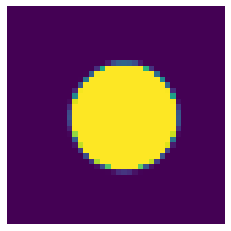

In [ ]:
t, x, y, w = (251, 160, 5, 40)
crop = training_image[y:y+w, x:x+w]
plt.imshow(crop)
plt.axis("off")
print(crop.shape)

In [ ]:
print(crop.shape)
crop = np.expand_dims(crop, axis = 2)


(40, 40)


In [ ]:

model = dt.models.LodeSTAR(input_shape=(None, None, 1))

train_set =   (
    dt.Value(crop)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
)
# model.model.consistency_weight = X
model.fit(
    train_set,
    epochs=100,
    batch_size=8,
)



Generating 160 / 160 samples before starting training
Epoch 1/100
160/160 [==============================] - 10s 12ms/step - total_loss: 1.4571 - consistency_loss: 0.8184
Epoch 2/100
160/160 [==============================] - 2s 10ms/step - total_loss: 0.9673 - consistency_loss: 0.4361
Epoch 3/100
160/160 [==============================] - 2s 14ms/step - total_loss: 0.2993 - consistency_loss: 0.0965
Epoch 4/100
160/160 [==============================] - 2s 13ms/step - total_loss: 0.1466 - consistency_loss: 0.0466
Epoch 5/100
160/160 [==============================] - 2s 13ms/step - total_loss: 0.1036 - consistency_loss: 0.0290
Epoch 6/100
160/160 [==============================] - 2s 12ms/step - total_loss: 0.2340 - consistency_loss: 0.0816
Epoch 7/100
160/160 [==============================] - 2s 12ms/step - total_loss: 0.0889 - consistency_loss: 0.0258
Epoch 8/100
160/160 [==============================] - 2s 13ms/step - total_loss: 0.2927 - consistency_loss: 0.0919
Epoch 9/100
160/1

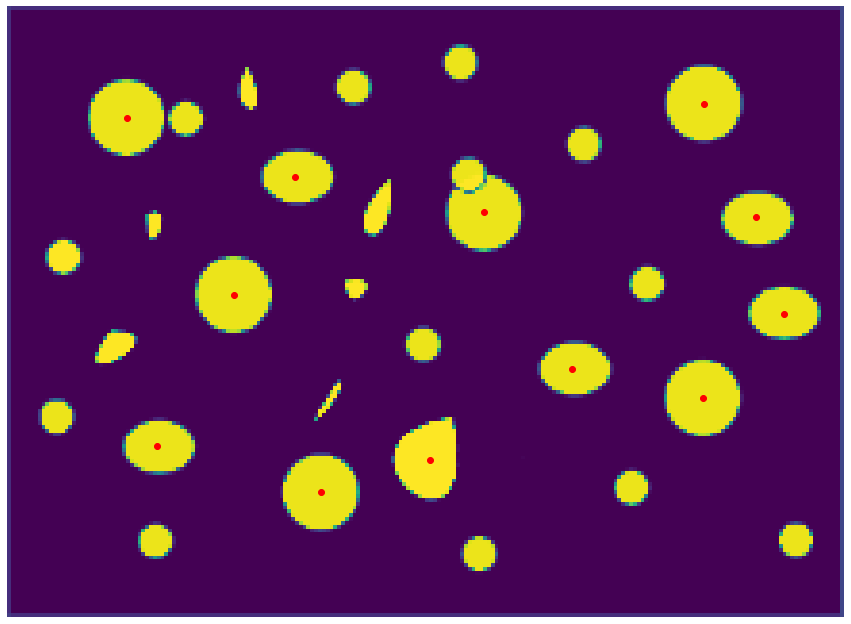

In [ ]:
#May need to tune these to get optimal performance!
alpha = 0.2
cutoff = 0.99

frame_index = 1763


training_image = dt.LoadImage(f"sintetica.png")()._value / 256
training_image = 0.21*training_image[:,:,0] + 0.72*training_image[:,:,1]+ 0.07*training_image[:,:,2]

image  = cv2.resize(training_image, (0, 0), fx=0.3, fy=0.3)
#image = np.expand_dims(image, axis = 2)


#image = dt.LoadImage(f"data/BF-C2DL-HSC/t{frame_index:04d}.tif")()._value / 256
#image = image[130:-130, :400]

detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], color="r")